# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

|a|b|
|-|-|
|1|2|

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* 10 variables :Attribute Information:
* Tenemos las features de nuestros pacientes, mientras que en la target tenemos la variable cuantitativa de diabetes
* 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [6]:
# datos
print(diabetes['data'].shape)
print(diabetes['data'].size)          # cantidad elementos matriz
print(diabetes['data'].ndim)           # numero dimensiones

(442, 10)
4420
2


In [7]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [8]:
# target
print(diabetes['target'].shape)
print(diabetes['target'].size)
print(diabetes['target'].ndim)

(442,)
442
1


In [9]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [10]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [11]:
# creamos instanciia regresion

diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [12]:
# Forma 1
diabetes_data_train = diabetes['data'][:-20]
diabetes_data_test = diabetes['data'][-20:,]

diabetes_target_train = diabetes['target'][:-20]
diabetes_target_test = diabetes['target'][-20:]


In [13]:
len(diabetes_data_train) == len(diabetes_target_train)

True

In [ ]:
# Forma 2
from sklearn.model_selection import train_test_split
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = \
train_test_split(diabetes['data'], diabetes['target'], test_size=422, shuffle=False)

In [14]:
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_train.shape)
print(diabetes_target_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


In [15]:
# Pasar array a dataframe
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [17]:
from scipy import stats

In [18]:
# Skew y Kurtosis
print(stats.skew(diabetes['target']))
print(stats.kurtosis(diabetes['target']))


0.43906639932477265
-0.8866436055681386


C:\Users\delac\AppData\Local\Temp\ipykernel_14844\3282374636.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['target']);


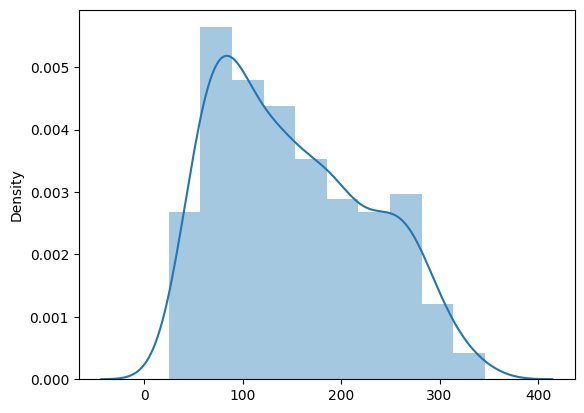

In [19]:
import seaborn as sns
sns.distplot(diabetes['target']);

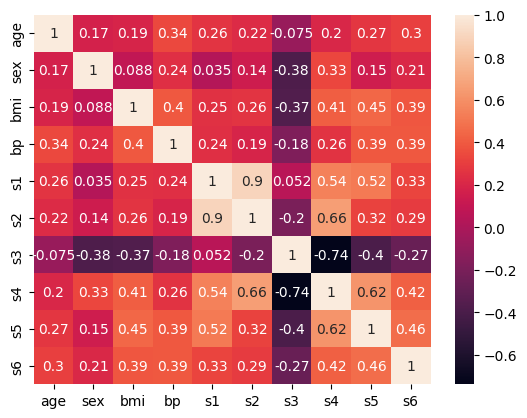

In [20]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only = True), annot=True);

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [21]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...
7.43e+02 = 7.43*^10^2 = 743

In [22]:
diabetes_model.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [23]:
coeff_df =pd.DataFrame(diabetes_model.coef_, diabetes['feature_names'], columns = ['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
s5,743.509388
bmi,510.538048
s2,492.799595
bp,327.729878
s4,184.603496
s3,102.841240
s6,76.096646
age,0.306094
sex,-237.635570
s1,-814.111926


In [24]:
diabetes_model.intercept_

152.76429169049118

In [25]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [26]:
print(diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error,r2_score

print("MAE: ", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE: ", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE: ", mean_squared_error(diabetes_target_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))
print("R2: ", r2_score(diabetes_target_test, predictions))

MAE:  36.60961865545879
MAPE:  0.39308761028730516
MSE:  2004.5186863342096
RMSE:  44.77185149549
R2:  0.585085427447195


#### Is `diabetes_target_test` exactly the same as the model prediction?

In [28]:
df_errors = pd.DataFrame(predictions, columns = ['prediction'])

df_errors['real_value'] = diabetes_target_test
df_errors['error'] = df_errors['prediction'] - df_errors['real_value']

df_errors

,prediction,real_value,error
0,197.618985,233.0,-35.381015
1,155.440320,91.0,64.440320
2,172.888751,111.0,61.888751
3,111.532706,152.0,-40.467294
4,164.793973,120.0,44.793973
5,131.067659,67.0,64.067659
6,259.124412,310.0,-50.875588
7,100.478737,94.0,6.478737
8,117.060054,183.0,-65.939946
9,124.302616,66.0,58.302616


#### Which are the most important features?

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(diabetes_data_train) #.fit_transform(diabetes_data_train)
diabetes_data_train_scaled = scaler.transform(diabetes_data_train)
diabetes_data_test_scaled = scaler.transform(diabetes_data_test)

diabetes_model_sc = LinearRegression()
diabetes_model_sc.fit(diabetes_data_train_scaled, diabetes_target_train)


LinearRegression()

In [30]:
coeff_df = pd.DataFrame(diabetes_model_sc.coef_,
                        diabetes['feature_names'],
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
s5,35.644497
bmi,24.295677
s2,23.384473
bp,15.598870
s4,8.799364
s3,4.817996
s6,3.606619
age,0.014631
sex,-11.300962
s1,-38.634072


In [31]:
predictions = diabetes_model_sc.predict(diabetes_data_test_scaled)

In [32]:
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

In [33]:
print("MAE: ", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE: ", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE: ", mean_squared_error(diabetes_target_test, predictions))
print("MSE2: ", mean_squared_error(diabetes_target_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))
print("R2: ", r2_score(diabetes_target_test, predictions))

MAE:  36.60961865545879
MAPE:  0.39308761028730504
MSE:  2004.51868633421
MSE2:  2004.51868633421
RMSE:  44.77185149549
R2:  0.5850854274471949


#### Iteramos con un nuevo modelo para comprobar si podemos mejorar el anterior

In [34]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<Axes: >

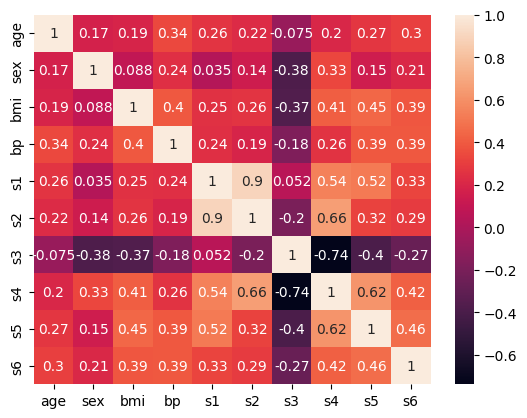

In [35]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

In [48]:
y = diabetes['target']
X = df.drop(['age', 's2'], axis=1) #columns = ['age', 's2']



In [37]:
X

,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019907,-0.017646
1,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068332,-0.092204
2,0.050680,0.044451,-0.005670,-0.045599,-0.032356,-0.002592,0.002861,-0.025930
3,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022688,-0.009362
4,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...
437,0.050680,0.019662,0.059744,-0.005697,-0.028674,-0.002592,0.031193,0.007207
438,0.050680,-0.015906,-0.067642,0.049341,-0.028674,0.034309,-0.018114,0.044485
439,0.050680,-0.015906,0.017293,-0.037344,-0.024993,-0.011080,-0.046883,0.015491
440,-0.044642,0.039062,0.001215,0.016318,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# Forma 2
from sklearn.model_selection import train_test_split

diabetes_data_test, diabetes_data_test, diabetes_target_train, diabetes_target_test = \
train_test_split(X, y, test_size=20, shuffle=False, random_state=17)


In [40]:
diabetes_model = LinearRegression()

diabetes_model.fit(diabetes_data_train,diabetes_target_train)

predictions = diabetes_model.predict(diabetes_data_test)

print("MAE: ", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE: ", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE: ", mean_squared_error(diabetes_target_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))
print("R2: ", r2_score(diabetes_target_test, predictions))


MAE:  36.60961865545879
MAPE:  0.39308761028730516
MSE:  2004.5186863342096
RMSE:  44.77185149549
R2:  0.585085427447195


In [45]:
len(diabetes_model_sc.coef_)

10

In [46]:
len(X.columns)

8

In [49]:
coeff_df = pd.DataFrame(diabetes_model_sc.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
s5,35.644497
bmi,24.295677
s2,23.384473
bp,15.598870
s4,8.799364
s3,4.817996
s6,3.606619
age,0.014631
sex,-11.300962
s1,-38.634072


In [ ]:
## X = df.copy()

In [50]:
coeff_df = pd.DataFrame(diabetes_model_sc.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False) # Vuelvo a declarar X con todas las columnas

,Coefficient
s5,35.644497
bmi,24.295677
s2,23.384473
bp,15.598870
s4,8.799364
s3,4.817996
s6,3.606619
age,0.014631
sex,-11.300962
s1,-38.634072
